In [1]:
# **********************************************************************************************************
# Author: Andi Sama 
# Purpose: Demonstrate Quantum Random Number Generator, generated by the real Quantum Computer
# Organization: Sinergi Wahana Gemilang
# Creation Date: May 29, 2020
# Changes history:
#   June 8, 2020: finalizing for article
# References:
#   - IBM Think2020 virtual event, May 5-6 2020
#   - IBM Quantum Experience on IBM Cloud
#   - Qiskit.org Youtube Channel
#   - Qiskit.org Textbook
#
# See article in medium.com/@andisama (July 2020)
# **********************************************************************************************************

In [2]:
from qiskit import *
%matplotlib inline

In [3]:
# just do this once - save your token to your computer to use later (IBMQ.load_account()
# get the token from your account in https://quantum-computing.ibm.com/
#  MyAccount -> Qiskit in local environment -> Copy Token
# IBMQ.save_account('your token here....') 

### A. Build The Quantum Circuit

In [4]:
qr = QuantumRegister(5) # quantum bit register
cr = ClassicalRegister(5) # classical bit register
circuit = QuantumCircuit(qr, cr)

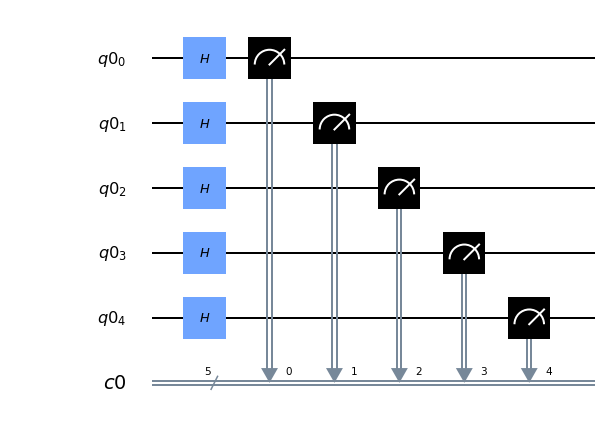

In [5]:
# create a quantum circuit containing 5 qubits
# all qubits in superposition (50%:50% chance to be in |0> or |1>) and independent of each other
circuit.h(qr)
circuit.measure(qr, cr)
circuit.draw(output='mpl', scale=1)

### B1. Execute the Quantum Circuit in Quantum Computer Simulator

In [6]:
from qiskit.tools.visualization import plot_histogram

In [7]:
# let's execute our Quantum Circuit
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend, shots=8192, memory=True).result()
# get all experiments (number of shots)
rawvalues_sim = result.get_memory()
print(rawvalues_sim)

['11011', '11010', '11000', '11100', '01111', '01100', '00011', '00111', '11000', '11100', '01000', '10010', '10110', '00100', '10001', '01110', '10111', '01110', '10101', '00001', '10011', '01011', '00110', '10110', '01111', '10001', '10110', '11010', '00110', '10011', '10011', '00000', '11100', '11010', '11001', '00100', '01001', '01110', '10111', '00000', '10000', '10110', '01001', '01010', '10100', '00011', '10110', '10000', '10101', '01110', '00000', '11001', '00100', '10000', '00011', '10001', '10100', '00011', '01010', '10101', '11100', '00101', '00000', '11100', '11101', '10000', '00010', '10111', '01101', '11000', '11100', '00001', '11000', '01001', '10101', '00001', '11010', '01101', '01010', '00000', '10101', '10011', '01001', '00101', '10101', '11011', '00111', '00001', '00011', '01100', '11001', '11110', '01001', '10110', '11010', '10000', '00011', '00100', '00101', '01101', '01001', '01111', '10100', '01011', '11000', '01001', '00000', '01100', '01101', '00010', '10110', 

In [8]:
counts = result.get_counts()
print(counts)

{'01110': 286, '10111': 285, '01010': 266, '10001': 279, '01011': 262, '00101': 267, '01111': 273, '11010': 241, '11000': 236, '00110': 233, '11001': 238, '01000': 235, '10100': 257, '10000': 257, '10101': 268, '00111': 264, '11100': 256, '10011': 237, '01001': 238, '00011': 254, '11110': 245, '10110': 273, '00010': 256, '10010': 288, '00100': 253, '11111': 262, '11101': 245, '11011': 249, '00000': 238, '01100': 260, '00001': 235, '01101': 256}


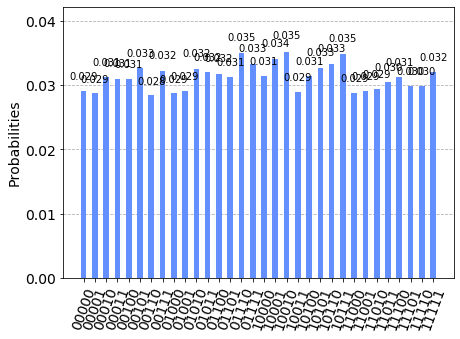

In [9]:
plot_histogram(counts)

In [10]:
print("Length of data:", len(rawvalues_sim))

# for each experiment per qubit, group 8 bits to be 1 byte (so we will have 1024 data with values = '0-255' per qubit)
# meaning we will have 5KB for this 5 qubits, with 8192 experiments
binarybytes = [];

# for each qubit
for round in range(0, 5):
    # construct sequence of 0s & 1s, creaating a Byte for each sequence of 8 bits
    # repeat (8192/8) times, from 1st data to 8192th data
    for i in range(0, len(rawvalues_sim), 8):
        b = int(rawvalues_sim[i][round] + rawvalues_sim[i+1][round] + rawvalues_sim[i+2][round] \
                + rawvalues_sim[i+3][round] + rawvalues_sim[i+4][round] \
                + rawvalues_sim[i+5][round] + rawvalues_sim[i+6][round] \
                + rawvalues_sim[i+7][round], 2)
        binarybytes.append(b)
    print("Last Bytes, Qubit: %d i: %d = %d" %(round, i, b))

Length of data: 8192
Last Bytes, Qubit: 0 i: 8184 = 70
Last Bytes, Qubit: 1 i: 8184 = 164
Last Bytes, Qubit: 2 i: 8184 = 190
Last Bytes, Qubit: 3 i: 8184 = 45
Last Bytes, Qubit: 4 i: 8184 = 159


In [11]:
# save to a file, hex format
newFileByteArray = bytearray(binarybytes)
newFile = open("asmQRNG_sim.bin", "wb")
newFile.write(newFileByteArray)    
newFile.close();

In [12]:
print(newFileByteArray)

bytearray(b'\xf0\xda\xa9v\xe2\xcb\x95\x99\xd6\xa8\xcc7\x02\x82dS&U A\xae\xdd\x96\xd9\x179\xae\xa7\xa0:\xec\x9a\x18\xf2C\xcc\tR\xd1\xdeQ$\xa7\x04\xef\xf9\x98\xa2\xa9Vf\xf7~\x8f\xdbA\x8d\x93\xe4\xacJ\xa0\xc7\x19\xc2\xde\x1a\xf9\xf4\xbc\xa9(to>\xb2\x05\xfb\xab\x87\x96\xd0\xf2E\xee\xa5\x80u\xf8Om\t"\xee\xf8\x9d\x14&~R\x8a9\xcc@\xa4V\xebv!\xa9A6A\xea\xeb\x81\x7f\xba\xda\x172O\xf9\xe1\x03\xe65\x94\xfe_j\x95\xb3e\x0b*\x05&\xd4=\\/A\xaf\xd3L\xce\x81\xb0\xbb\xd2\x0b!\xeb\xf0}\x0e\xe11$q\x815.\x06\x1a\x01\x18\xb0\'\xb1\xd3\x86Uf\x11*\xde\x19E\xdd\x07l^\r\x9b\xf0\xfc\xd4bN\x12x}@n\xa5K\xe4L\xf7*\xa4\xba\xfa\xe0\xa2\xd8\\\x07p<\x10\x88\x97h\x0f9;z\xf4\xdaAW\xd5\xd6\x8b~\xf8\xec\xa1\xe2uym\x97\x04&\xc5\xe1\x1a\xcefp]\xa7\xd1D\x86\x04\xa9\xf6\x87\xc0r\x7f !s\xab\xa37\xa2J\x1d\xd2n\xd9uSl|\x7f\x80\xda:\x84\x8d\xbfk3q[\x18\xcc\xdda\x19qVc^v\x08B\x0f6\xf8\xb6\xf8\xb7\x97\xd5ri\xce@Cn@\xe0\xff\x12A\xaa1\xf6L\xd1P\xd4&E\nb\x1f\x9e\xf7+\x00\xf1_U\x9d\xf9\xc6\xd2\xad\xff\x94g\x94\x0f\x9f{\x89\xcdk\x8c\x0fF

### B2. Execute the Quantum Circuit in real Quantum Computer on IBM Quantum Computing Experience

In [13]:
# Run our quantum circuit on The "Quantum Computer on IBM Cloud" by submitting a job containing our defined quantum circuit
from qiskit.tools.monitor import job_monitor
# load saved credential to access IBM Quantum Computing Experience on IBM Cloud
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [14]:
# define the backend IBM quantum computer simulator to use
qprovider = IBMQ.get_provider('ibm-q')
qbackend = qprovider.get_backend('ibmq_london')

In [15]:
backend.configuration()

QasmBackendConfiguration(backend_name='qasm_simulator', backend_version='0.5.1', basis_gates=['u1', 'u2', 'u3', 'cx', 'cz', 'id', 'x', 'y', 'z', 'h', 's', 'sdg', 't', 'tdg', 'swap', 'ccx', 'unitary', 'diagonal', 'initialize', 'cu1', 'cu2', 'cu3', 'cswap', 'mcx', 'mcy', 'mcz', 'mcu1', 'mcu2', 'mcu3', 'mcswap', 'multiplexer', 'kraus', 'roerror'], conditional=True, coupling_map=None, description='A C++ simulator with realistic noise for QASM Qobj files', gates=[GateConfig(u1, ['lam'], gate u1(lam) q { U(0,0,lam) q; }, True, 'Single-qubit gate [[1, 0], [0, exp(1j*lam)]]'), GateConfig(u2, ['phi', 'lam'], gate u2(phi,lam) q { U(pi/2,phi,lam) q; }, True, 'Single-qubit gate [[1, -exp(1j*lam)], [exp(1j*phi), exp(1j*(phi+lam))]]/sqrt(2)'), GateConfig(u3, ['theta', 'phi', 'lam'], gate u3(theta,phi,lam) q { U(theta,phi,lam) q; }, True, 'Single-qubit gate with three rotation angles'), GateConfig(cx, [], gate cx c,t { CX c,t; }, True, 'Two-qubit Controlled-NOT gate'), GateConfig(cz, [], gate cz a,b 

In [16]:
job = execute(circuit, backend=qbackend, shots=8192, memory=True)
job_monitor(job)

# for i in range(0, 1024)
#     job = execute(circuit, backend=qbackend, shots=8192, memory=True)
#     job_monitor(job)

Job Status: job has successfully run


In [17]:
# check error message from job execution
# print(job.error_message())

In [18]:
rawvalues_ibmq = job.result().get_memory()
print(rawvalues_ibmq)

['11101', '10110', '11101', '11010', '01010', '01010', '00000', '11110', '10111', '11010', '00000', '01001', '10001', '11100', '01011', '11011', '01110', '00011', '00111', '01101', '01011', '10110', '10110', '01110', '00100', '00001', '10111', '10010', '00010', '01001', '11010', '01001', '00011', '11111', '00100', '11000', '01000', '10101', '11000', '00110', '00001', '10100', '01000', '11110', '01010', '10000', '01111', '00110', '11101', '01010', '01000', '00111', '10100', '11100', '00000', '10101', '01010', '11010', '01110', '10010', '00011', '10001', '00010', '00100', '00101', '10000', '10011', '11101', '00011', '11011', '01100', '01110', '00100', '00000', '00101', '11011', '00110', '10110', '01011', '11101', '00110', '11000', '10010', '00000', '01000', '00101', '00011', '11110', '01001', '11010', '00001', '10011', '00110', '10110', '00111', '11000', '01010', '11110', '10101', '11111', '10011', '00001', '00110', '00000', '10000', '01111', '00000', '11000', '00100', '00111', '00001', 

In [19]:
result = job.result()
counts = result.get_counts()
print(counts)

{'01110': 235, '10111': 222, '01010': 250, '10001': 266, '01011': 245, '00101': 279, '01111': 234, '11010': 210, '11000': 212, '00110': 276, '11001': 231, '01000': 304, '10100': 221, '10000': 266, '10101': 245, '00111': 283, '11100': 190, '10011': 251, '01001': 280, '00011': 299, '11110': 222, '10110': 233, '00010': 373, '10010': 267, '00100': 285, '11111': 197, '11101': 203, '11011': 210, '00000': 343, '01100': 256, '00001': 358, '01101': 246}


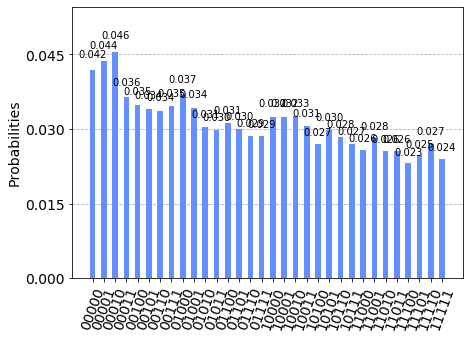

In [20]:
plot_histogram(counts)

In [21]:
import time

print("Length of data:", len(rawvalues_ibmq))

# for each experiment per qubit, group 8 bits to be 1 byte (so we will have 1024 data with values = '0-255' per qubit)
# meaning we will have 5KB for this 5 qubits, with 8192 experiments
binarybytes = [];

# for each qubit
for round in range(0, 5):
    # construct sequence of 0s & 1s, creaating a Byte for each sequence of 8 bits
    # repeat (8192/8) times, from 1st data to 8192th data
    print("Sample constructed data, 1st Byte")
    for i in range(0, len(rawvalues_ibmq), 8):
        b = int(rawvalues_ibmq[i][round] + rawvalues_ibmq[i+1][round] + rawvalues_ibmq[i+2][round] \
                + rawvalues_ibmq[i+3][round] + rawvalues_ibmq[i+4][round] \
                + rawvalues_ibmq[i+5][round] + rawvalues_ibmq[i+6][round] \
                + rawvalues_ibmq[i+7][round], 2)
        # just print sample constructed data, 1st Byte only
        if i==0:
            print("- Qubit: %d, Byte Sequence: %d (%d'b%s%s%s%s%s%s%s%s')" %(round, i, b, \
                rawvalues_ibmq[i][round], rawvalues_ibmq[i+1][round], \
                rawvalues_ibmq[i+2][round], rawvalues_ibmq[i+3][round], \
                rawvalues_ibmq[i+4][round], rawvalues_ibmq[i+5][round], \
                rawvalues_ibmq[i+6][round], rawvalues_ibmq[i+7][round]))
        binarybytes.append(b)
    print("Last Bytes, Qubit: %d i: %d = %d" %(round, i, b))

Length of data: 8192
Sample constructed data, 1st Byte
- Qubit: 0, Byte Sequence: 0 (241'b11110001')
Last Bytes, Qubit: 0 i: 8184 = 121
Sample constructed data, 1st Byte
- Qubit: 1, Byte Sequence: 0 (189'b10111101')
Last Bytes, Qubit: 1 i: 8184 = 25
Sample constructed data, 1st Byte
- Qubit: 2, Byte Sequence: 0 (225'b11100001')
Last Bytes, Qubit: 2 i: 8184 = 114
Sample constructed data, 1st Byte
- Qubit: 3, Byte Sequence: 0 (93'b01011101')
Last Bytes, Qubit: 3 i: 8184 = 0
Sample constructed data, 1st Byte
- Qubit: 4, Byte Sequence: 0 (160'b10100000')
Last Bytes, Qubit: 4 i: 8184 = 11


In [22]:
# save to a file, hex format
newFileByteArray = bytearray(binarybytes)
newFile = open("asmQRNG_ibmq.bin", "wb")
newFile.write(newFileByteArray)    
newFile.close();